# Chapter 2: Hash Maps and Sets


## Pair Sum - Unsorted - Easy


Given an array of integers, return the indexes of any two numbers that add up to a target. The order of the indexes in the result doesn't matter. If no pair is found, return an empty array.

Example:
Input: nums = [-1, 3, 4, 2], target = 3
Output: [0, 2]
Explanation: nums[0] + nums[2] = -1 + 4 = 3

Constraints:
The same index cannot be used twice in the result.


In [24]:
from typing import List


def pair_sum_unsorted(nums: List[int], target: int) -> List[int]:
    # initialize
    seen_numbers = {}  # holds num as key, index as value

    for idx, num in enumerate(nums):
        # compute the complement(other number)
        complement = target - num  # 3 - (4) = -1
        # check if we have the complement in the seen numbers
        if complement in seen_numbers:
            return [seen_numbers[complement], idx]
        else:
            seen_numbers[num] = idx
    return []


nums = [-1, 3, 4, 2]
target = 3

pair_sum_unsorted(nums=nums, target=target)

[0, 2]

In [7]:
test_dict = {"a": 2, "b": 3}

"a" in test_dict.keys()

True

## Verify Sudoku Board - Medium


Given a partially completed 9×9 Sudoku board, determine if the current state of the board adheres to the rules of the game:

Each row and column must contain unique numbers between 1 and 9, or be empty (represented as 0).

Each of the nine 3×3 subgrids that compose the grid must contain unique numbers between 1 and 9, or be empty.

Note: You are asked to determine whether the current state of the board is valid given these rules, not whether the board is solvable.

Example:
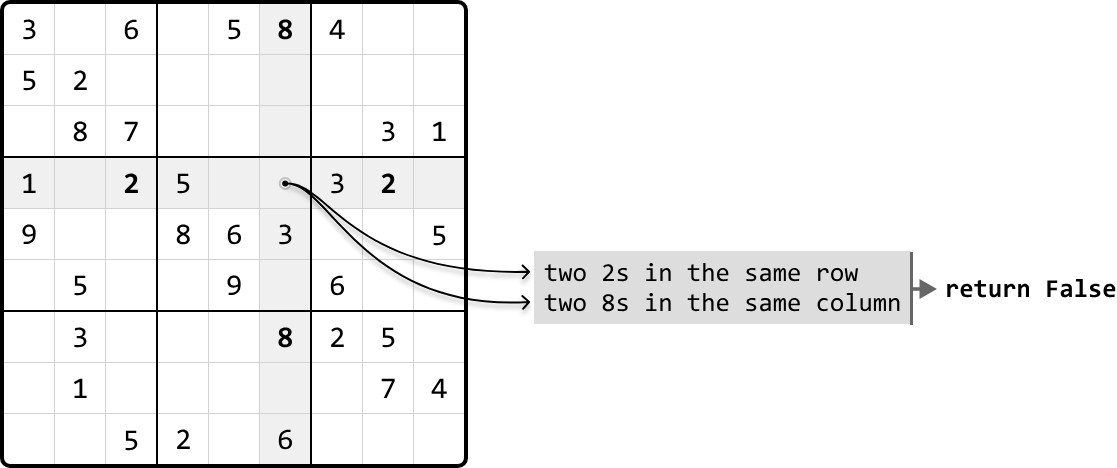

Example
Output: False
Constraints:
Assume each integer on the board falls in the range of [0, 9].


In [3]:
from typing import List


def verify_sudoku_board(board: List[List[int]]) -> bool:
    # 	row_sets: A list of 9 empty sets (one for each row).
    #   column_sets: A list of 9 empty sets (one for each column).
    #   subgrid_sets: A 3x3 grid of empty sets, representing the 9 subgrids in the board.
    row_sets = [set() for _ in range(9)]
    column_sets = [set() for _ in range(9)]
    subgrid_sets = [[set() for _ in range(3)] for _ in range(3)]

    # Iterating over rows and columns
    for r in range(9):
        for c in range(9):
            num = board[r][c]
            if num == 0:
                continue
            if num in row_sets[r]:
                return False
            if num in column_sets[c]:
                return False
            if num in subgrid_sets[r // 3][c // 3]:
                return False
            row_sets[r].add(num)
            column_sets[c].add(num)
            subgrid_sets[r // 3][c // 3].add(num)

    # pretty print the results
    print("Row Sets:")
    for row in row_sets:
        print(["{" + ", ".join(map(str, sorted(row))) + "}"])

    print("\nColumn Sets:")
    for col in column_sets:
        print(["{" + ", ".join(map(str, sorted(col))) + "}"])

    print("\nSubgrid Sets:")
    for subgrid_row in subgrid_sets:
        print(
            [
                "{" + ", ".join(map(str, sorted(subgrid_row[col]))) + "}"
                for col in range(3)
            ]
        )

    # return the result
    return True


# answer for the board
board = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9],
]

verify_sudoku_board(board)

Row Sets:
['{3, 5, 7}']
['{1, 5, 6, 9}']
['{6, 8, 9}']
['{3, 6, 8}']
['{1, 3, 4, 8}']
['{2, 6, 7}']
['{2, 6, 8}']
['{1, 4, 5, 9}']
['{7, 8, 9}']

Column Sets:
['{4, 5, 6, 7, 8}']
['{3, 6, 9}']
['{8}']
['{1, 4, 8}']
['{1, 2, 6, 7, 8, 9}']
['{3, 5, 9}']
['{2}']
['{6, 7, 8}']
['{1, 3, 5, 6, 9}']

Subgrid Sets:
['{3, 5, 6, 8, 9}', '{1, 5, 7, 9}', '{6}']
['{4, 7, 8}', '{2, 3, 6, 8}', '{1, 3, 6}']
['{6}', '{1, 4, 8, 9}', '{2, 5, 7, 8, 9}']


True

In [2]:
board[0][1]

3

## Zero Striping - Medium


For each zero in an m x n matrix, set its entire row and column to zero in place.

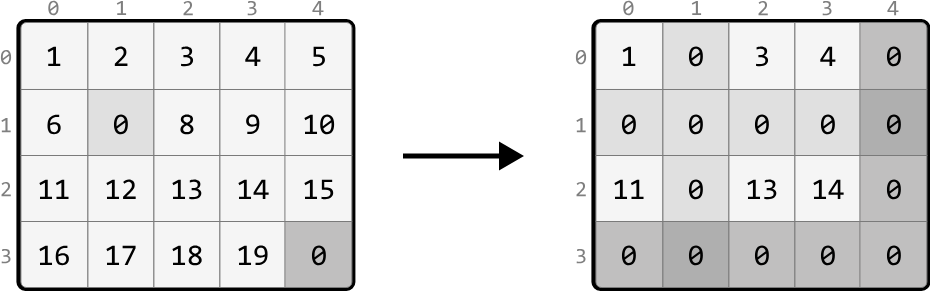


In [62]:
from typing import List


def zero_striping_hash_sets(matrix: List[List[int]]) -> None:
    if not matrix or not matrix[0]:
        return
    m, n = len(matrix), len(matrix[0])
    zero_rows, zero_cols = set(), set()
    # Pass 1: Traverse through the matrix to identify the rows and
    # columns containing zeros and store their indexes in the
    # appropriate hash sets.
    for r in range(m):
        for c in range(n):
            if matrix[r][c] == 0:
                zero_rows.add(r)
                zero_cols.add(c)

    # Pass 2: Set any cell in the matrix to zero if its row index is
    # in 'zero_rows' or its column index is in 'zero_cols'.
    for r in range(m):
        for c in range(n):
            if r in zero_rows or c in zero_cols:
                matrix[r][c] = 0


board = [[1, 2, 3, 4, 5], [6, 0, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 0]]
for row in board:
    print(" ".join(f"{num:2}" for num in row))
print("\n")

zero_striping_hash_sets(matrix=board)
for row in board:
    print(" ".join(f"{num:2}" for num in row))

 1  2  3  4  5
 6  0  8  9 10
11 12 13 14 15
16 17 18 19  0


 1  0  3  4  0
 0  0  0  0  0
11  0 13 14  0
 0  0  0  0  0


In [53]:
board

[[1, 0, 3, 4, 0], [0, 0, 0, 0, 0], [11, 0, 13, 14, 0], [0, 0, 0, 0, 0]]

In [54]:
board = [[1, 2, 3, 4, 5], [6, 0, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 0]]

for row in board:
    print(" ".join(f"{num:2}" for num in row))

 1  2  3  4  5
 6  0  8  9 10
11 12 13 14 15
16 17 18 19  0


In [38]:
not board[0][:1]

False

## Longest Chain of Consecutive Numbers - Medium


In [9]:
from typing import List


def longest_chain_of_consecutive_numbers(nums: List[int]) -> int:
    # initialize longest chain
    if not nums:
        return 0
    num_set = set(nums)
    longest_chain = 0
    for num in num_set:
        # If the current number is the smallest number in its chain, search for
        # the length of its chain.
        if num - 1 not in num_set:
            current_num = num
            current_chain = 1
            # Continue to find the next consecutive numbers in the chain.
            while current_num + 1 in num_set:
                current_num += 1
                current_chain += 1
            longest_chain = max(longest_chain, current_chain)
    return longest_chain


# Example usage
nums = [1, 6, 2, 5, 8, 7, 10, 3]
print(longest_chain_of_consecutive_numbers(nums))  # Output: 5

4


## Geometric Sequence Triplets - Medium
